# BMA HW 1 (coded in python 3)

## Question 2a

Text(0.5, 1.0, 'Random Walks')

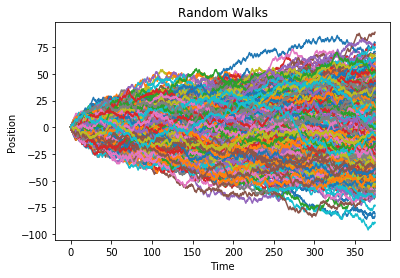

In [93]:
import numpy as np
import matplotlib.pyplot as plt
p=750 #position
dx = 1
dt =.5 
t=750
runs = 1000
Time = np.zeros(t)
Pos = np.zeros((runs,p))
Time = [dt*y  for y in range(t)]
#initializes the desired variables

#loop for n random walks
for n in range(runs):
    for g in range(p-1):
        if np.random.random() < .5:
            Pos[n][g+1] = Pos[n][g]+dx
        else:
            Pos[n][g+1]= Pos[n][g]-dx
    plt.plot(Time,Pos[n,:])
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Random Walks')

In the above diagram we ran 1000 simulations of a unbiased random walk with 750 time steps per simulation, with dt=.5 and dx=1
As can be see, the walks appear to create a roughly symmetric distribution running from a little over 75 to slightly under -75. 

Text(0.5, 1.0, 'Mean Position over time')

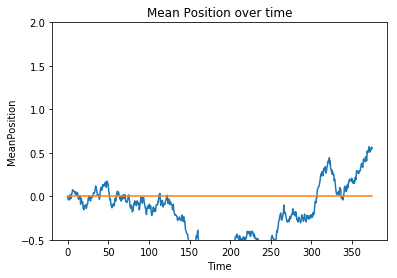

In [94]:
Mean_pos=np.zeros(p)
Mean_abs_pos=np.zeros(p)
Mean_sqr_pos=np.zeros(p)
for v in range(p):
    Mean_pos[v]=np.mean(Pos[:,v])
    Mean_abs_pos[v]=np.mean(abs(Pos[:,v]))
    Mean_sqr_pos[v]=np.mean((Pos[:,v])**2)
   
    


plt.plot(Time,Mean_pos)
plt.plot(Time,np.zeros(750))
plt.ylim(-.5,2)
plt.xlabel('Time')
plt.ylabel('MeanPosition')
plt.title('Mean Position over time')


Looking at our mean position as a function of time, it appears it roughly hovers about 0 reinforcing the idea there is a symmetry in the runs above and below 0 across all times t.

[-0.32468894  1.14318512]


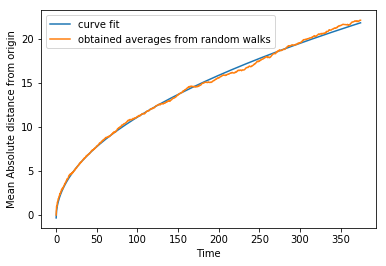

In [117]:
import scipy.optimize as optimize
def sqrt_func(x,a,b):
    return a+b*np.sqrt(x)
Con,Cov= optimize.curve_fit(sqrt_func,Time,Mean_abs_pos) #constants and covariance matrix for square root regression
print(Con)
Time_Mean_abs_pos_a2=[Con[1]*np.sqrt(x)+Con[0] for x in Time]
plt.plot(Time,Time_Mean_abs_pos_a2,label='curve fit')
plt.plot(Time,Mean_abs_pos,label='obtained averages from random walks')
plt.xlabel('Time')
plt.ylabel('Mean Absolute distance from origin')
plt.legend()

In the above figure we plot the mean absolute distance over time. The mean absolute distance appears to change as the square-root of the amount of time that has passed.  We create a curve fit using the model a+b*sqrt(dt) and find it matches quite well with the data.

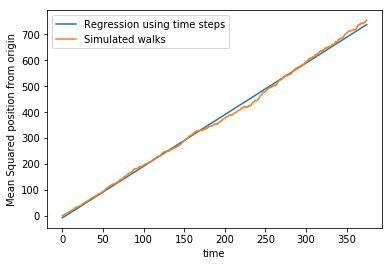

In [99]:
a_1,b_1=np.polyfit(Time,Mean_sqr_pos,1)
Time_Mean_sqr_pos_2a=[a_1*x+b_1 for x in Time]
plt.plot(Time, Time_Mean_sqr_pos_2a,label='Regression using time steps')
plt.plot(Time,Mean_sqr_pos,label='Simulated walks')
plt.xlabel('time')
plt.ylabel('Mean Squared position from origin')
plt.legend()


We do a similar approach as in the first figure but this time perform a linear regression of the form ax+b.  For the units to match a must be of the form dx/dt and b of dx.

Text(0, 0.5, 'counts')

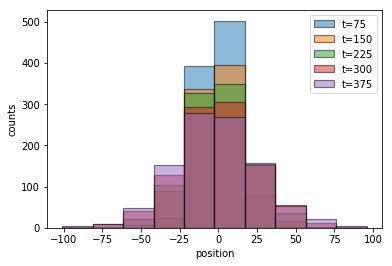

In [25]:
for m in range(5):
    if m == 4:#Alpha effects transparency of histogram,bins affects total number of bins and range sets the upper and lower bounds of the histogram
        plt.hist(Pos[:,749],label='t=375',linestyle='solid',alpha=.5,linewidth=1.2,edgecolor='black',bins=10,range=[np.amin(Pos),np.amax(Pos)])
    else:
        plt.hist(Pos[:,150*(m+1)],label='t='+str((m+1)*75),alpha=.5,linewidth=1.2,linestyle='solid',edgecolor='black',bins=10,range=[np.amin(Pos),np.amax(Pos)])
plt.legend()
plt.xlabel('position')
plt.ylabel('Counts')

In the above, we plot 5 histograms corresponding to 5 different time slices and collect the counts of the number of runs at various positions at those times.  What can be noticed is the histograms are roughly normally-distributed,but as time progresses the range of positions becomes more spread out, which would agree with the idea that this approximates diffusion.  However, the data  remains largely collected in the -25 to 25 range even at the final time t=375.

## Question 2b:

Text(0.5, 1.0, 'Biased Random Walks')

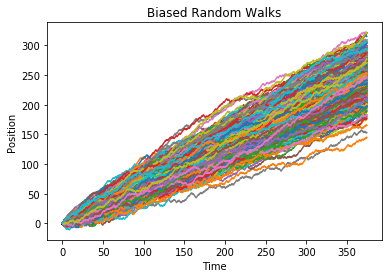

In [49]:

p=750 #position
dx = 1
dt =.5 
t=750
runs = 1000
Time = np.zeros(t)
Pos = np.zeros((runs,p))
Time = [dt*y  for y in range(t)]
#initializes the desired variables

#loop for n random walks
for n in range(runs):
    for g in range(p-1):
        if np.random.random() < 2/3:
            Pos[n][g+1] = Pos[n][g]+dx
        else:
            Pos[n][g+1]= Pos[n][g]-dx
    plt.plot(Time,Pos[n,:])
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Biased Random Walks')

In the above diagram, we create 1000 biased random walks where the probability of moving right is 2/3 and the probability of moving left is 1/3. Again, we utilize the same dx,dt and 750 total steps per run. Here we notice spread that looks much tighter than in 2a and as expected the bias causes all runs to move to the right.  There appears to be a spread running from a little over 300 to something under 150 at the final time

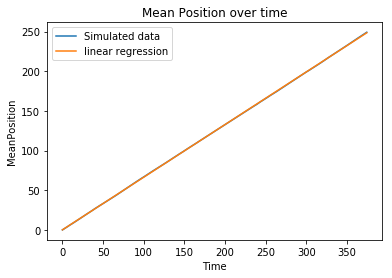

In [70]:
Mean_pos=np.zeros(p)
Mean_abs_pos=np.zeros(p)
Mean_sqr_pos=np.zeros(p)
for v in range(p):
    Mean_pos[v]=np.mean(Pos[:,v])
    Mean_abs_pos[v]=np.mean(abs(Pos[:,v]))
    Mean_sqr_pos[v]=np.mean((Pos[:,v])**2)
   
    

m,b=np.polyfit(Time,Mean_pos,1)
Time_mean_pos_2b=[x*m+b for x in Time]
plt.plot(Time,Mean_pos,label='Simulated data')
plt.xlabel('Time')
plt.ylabel('MeanPosition')
plt.title('Mean Position over time')
plt.plot(Time,Time_mean_pos_2b,label='linear regression')
plt.legend()


We pefrom a similar regression as in 2a with the Mean squared position.  Here we see a linear relationship that is much tighter than the unbiased random walk. 

Text(0, 0.5, 'Mean Absolute Position from origin')

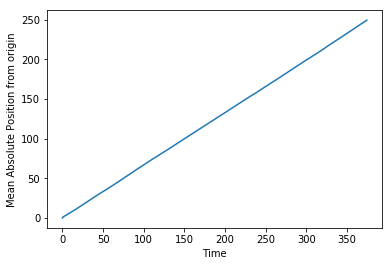

In [51]:
plt.plot(Time,Mean_abs_pos)
plt.xlabel('Time')
plt.ylabel('Mean Absolute Position from origin')

In calculating the Mean absolute position, there is no difference from that of the mean position because no negative positions are crossed in these biased random walks

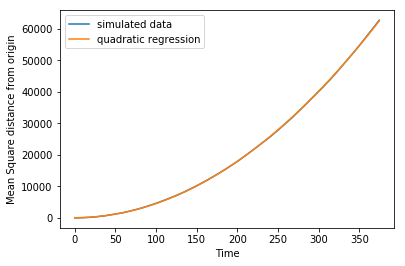

In [74]:
a_2,b_2,c_2=np.polyfit(Time,Mean_sqr_pos,2)
Time_Mean_sqr_pos_2b=[a_2*x**2+b_2*x+c_2 for x in Time]
plt.plot(Time,Mean_sqr_pos,label='simulated data')
plt.plot(Time,Time_Mean_sqr_pos_2b,label='quadratic regression')
plt.xlabel('Time')
plt.ylabel('Mean Square distance from origin')
plt.legend()

Here in 2b the Mean squared distance from the origin is exponetinal, fitting it with a curve we see it is matched very well by a second degree polynomial.

Text(0, 0.5, 'Counts')

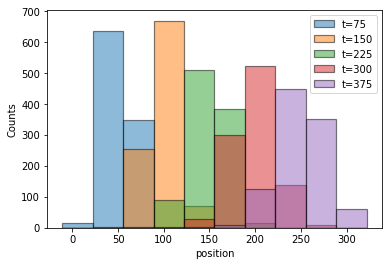

In [53]:
for m in range(5):
    if m == 4:
        plt.hist(Pos[:,749],label='t=375',linestyle='solid',alpha=.5,linewidth=1.2,edgecolor='black',bins=10,range=[np.amin(Pos),np.amax(Pos)])
    else:
        plt.hist(Pos[:,150*(m+1)],label='t='+str((m+1)*75),alpha=.5,linewidth=1.2,linestyle='solid',edgecolor='black',bins=10,range=[np.amin(Pos),np.amax(Pos)])
plt.legend()
plt.xlabel('position')
plt.ylabel('Counts')

Finally, we see in our last set of figures the histograms generated for the biased random walks at the same times as the unbiased random walks.  What can be noticed is that the central portion of the histograms moves further to the right as time progresses.  So unlike in the random walk where diffusion occurred about 0, here the walks move towards the right and obtain a wider spread shifted  over in the postive x-direction.